In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset/IMDB Dataset.csv


In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('/kaggle/input/imdb-dataset/IMDB Dataset.csv')

In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
# Preprocessing
# Encode labels
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])  # 1 for positive, 0 for negative

In [8]:
positive_reviews = " ".join(review for review in data[data['sentiment'] == 1]['review'])
negative_reviews = " ".join(review for review in data[data['sentiment'] == 0]['review'])

In [9]:
plt.figure(figsize=(15, 7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

Text(0.5, 1.0, 'Word Cloud for Positive Reviews')

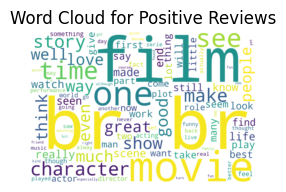

In [10]:
# Positive reviews word cloud
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=1200, height=800, background_color='white', max_words=100).generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')

Text(0.5, 1.0, 'Word Cloud for Negative Reviews')

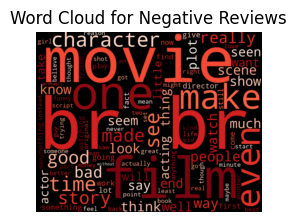

In [11]:
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=1000, height=800, background_color='black', colormap='Reds', max_words=100).generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

In [13]:
# Tokenization and padding
vocab_size = 10000  # Adjust based on memory and size of dataset
max_length = 200
oov_tok = "<OOV>"

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [15]:
# Model Building
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
num_epochs = 5
history = model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_test_padded, y_test), verbose=2)

Epoch 1/5
1250/1250 - 211s - 169ms/step - accuracy: 0.5659 - loss: 0.6690 - val_accuracy: 0.6764 - val_loss: 0.6041
Epoch 2/5
1250/1250 - 198s - 159ms/step - accuracy: 0.6264 - loss: 0.6326 - val_accuracy: 0.5816 - val_loss: 0.6426
Epoch 3/5
1250/1250 - 192s - 154ms/step - accuracy: 0.7323 - loss: 0.5033 - val_accuracy: 0.8660 - val_loss: 0.3235
Epoch 4/5
1250/1250 - 189s - 151ms/step - accuracy: 0.8899 - loss: 0.2776 - val_accuracy: 0.8724 - val_loss: 0.3068
Epoch 5/5
1250/1250 - 199s - 159ms/step - accuracy: 0.9137 - loss: 0.2271 - val_accuracy: 0.8667 - val_loss: 0.3271


In [18]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.8676 - loss: 0.3235
Test Accuracy: 86.67%
